<a href="https://colab.research.google.com/github/aniketmishr/ml-tutorial/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import metrics

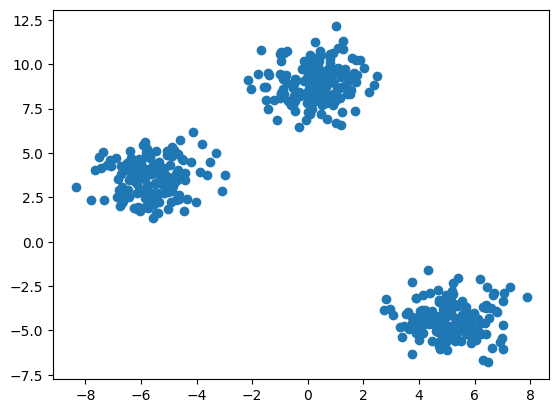

In [86]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)
plt.scatter(X[:,0],X[:,1])

#K-Means Clustering

In [87]:
k = 3 # numbers of clusters
clusters = {}
for i in range(k):
  center = 2*(2*np.random.random((X.shape[1],))-1)
  points = []
  cluster = {
      'center': center,
      'points' : points
  }
  clusters[i] = cluster

print(clusters) # data structure storing different means with their centers and items

{0: {'center': array([-1.179563  ,  1.04076375]), 'points': []}, 1: {'center': array([1.57174282, 1.80222609]), 'points': []}, 2: {'center': array([-1.32305632, -0.88221427]), 'points': []}}


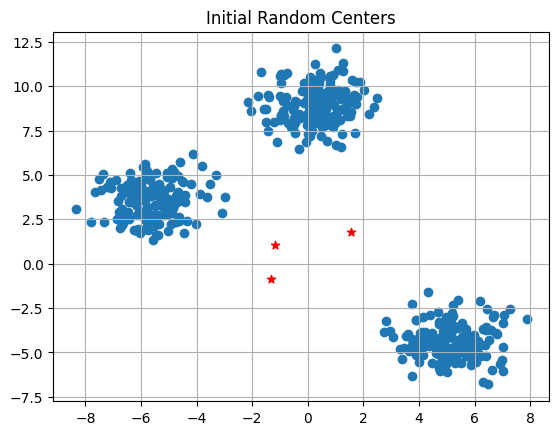

In [88]:


plt.scatter(X[:,0],X[:,1])
plt.title("Initial Random Centers")
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [89]:
def distance(p1,p2): # calculates euclidean distance between two points in space
  return np.sqrt(np.sum((p1-p2)**2))

In [90]:
def assign_clusters(X,clusters):
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      d = distance(X[i], clusters[j]['center'])
      dist.append(d)

    curr_cluster = np.argmin(dist) # returns the index of the minimum item
    clusters[curr_cluster]['points'].append(X[i])

  return clusters

In [91]:

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [93]:

def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


In [94]:
for i in range(100):
  clusters = assign_clusters(X,clusters)
  clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

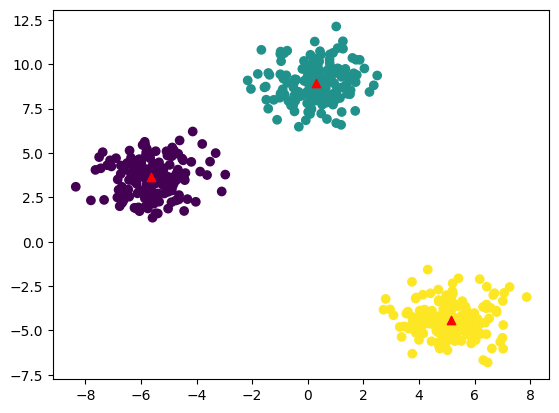

In [95]:

plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
